# [OpenCV – k 平均法で画像の代表色を取得する方法](https://pystyle.info/opencv-kmeans/)

In [ ]:
!curl --output sample.jpg https://pystyle.info/wp/wp-content/uploads/2020/08/opencv-kmeans_01.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 66418  100 66418    0     0   227k      0 --:--:-- --:--:-- --:--:--  227k


In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))


# 画像を読み込む。
img = cv2.imread("sample.jpg")

# 画像で使用されている色一覧。(W * H, 3) の numpy 配列。
colors = img.reshape(-1, 3).astype(np.float32)

# クラスタ数
K = 5

# 最大反復回数: 10、移動量の閾値: 1.0
criteria = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0

ret, labels, centers = cv2.kmeans(
    colors, K, None, criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS
)

print(f"ret: {ret:.2f}, label: {labels.shape}, center: {centers.shape}")
# ret: 127443.79220199585, label: (48380, 1), center: (8, 3)

labels = labels.squeeze(axis=1)  # (N, 1) -> (N,)
centers = centers.astype(np.uint8)  # float32 -> uint8


ret: 131475677.91, label: (140500, 1), center: (5, 3)


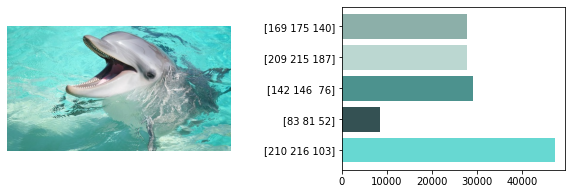

In [ ]:
# 各クラスタに属するサンプル数を計算する。
_, counts = np.unique(labels, axis=0, return_counts=True)

# 可視化する。
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 3))
fig.subplots_adjust(wspace=0.5)

# matplotlib の引数の仕様上、[0, 1] にして、(R, G, B) の順番にする。
bar_color = centers[:, ::-1] / 255
bar_text = list(map(str, centers))

# 画像を表示する。
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()

# ヒストグラムを表示する。
ax2.barh(np.arange(K), counts, color=bar_color, tick_label=bar_text)
plt.show()


In [ ]:
%matplotlib inline

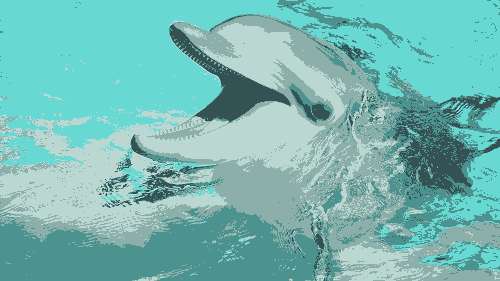

In [ ]:
# 各画素を k平均法の結果に置き換える。
dst = centers[labels].reshape(img.shape)
#imshow(dst)

from google.colab.patches import cv2_imshow
cv2_imshow(dst)